In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
import matplotlib.pyplot as plt

In [3]:
max_features = 10000  # Tamanho do vocabulário
maxlen = 100         # Número máximo de palavras por review
batch_size = 32

# Carregar dataset IMDB
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Padding para garantir que todas as sequências tenham o mesmo comprimento
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [4]:
# Construir modelo RNN
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 32, input_length=maxlen))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
rnn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Treinar o modelo RNN e medir o tempo
start_time = time.time()
rnn_history = rnn_model.fit(X_train, y_train,
                           epochs=5,
                           batch_size=batch_size,
                           validation_split=0.2,
                           verbose=1)
rnn_training_time = time.time() - start_time

# Avaliar o modelo RNN
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test, y_test, verbose=0)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5887 - loss: 0.6585 - val_accuracy: 0.7914 - val_loss: 0.4582
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8218 - loss: 0.4164 - val_accuracy: 0.8094 - val_loss: 0.4333
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8987 - loss: 0.2698 - val_accuracy: 0.7928 - val_loss: 0.4872
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9441 - loss: 0.1638 - val_accuracy: 0.8106 - val_loss: 0.5287
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9732 - loss: 0.0845 - val_accuracy: 0.7908 - val_loss: 0.6408


In [5]:
# Construir modelo LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 128, input_length=maxlen))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
lstm_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Treinar o modelo LSTM e medir o tempo
start_time = time.time()
lstm_history = lstm_model.fit(X_train, y_train,
                             epochs=5,
                             batch_size=batch_size,
                             validation_split=0.2,
                             verbose=1)
lstm_training_time = time.time() - start_time

# Avaliar o modelo LSTM
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test, verbose=0)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 203ms/step - accuracy: 0.6960 - loss: 0.5577 - val_accuracy: 0.8374 - val_loss: 0.3716
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 201ms/step - accuracy: 0.8875 - loss: 0.2842 - val_accuracy: 0.8416 - val_loss: 0.3659
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 207ms/step - accuracy: 0.9220 - loss: 0.1986 - val_accuracy: 0.8366 - val_loss: 0.3900
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 202ms/step - accuracy: 0.9510 - loss: 0.1372 - val_accuracy: 0.8362 - val_loss: 0.4682
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 206ms/step - accuracy: 0.9672 - loss: 0.0974 - val_accuracy: 0.8380 - val_loss: 0.5928


Resultados:
RNN - Acurácia no teste: 0.7910, Tempo de treinamento: 102.64 segundos
LSTM - Acurácia no teste: 0.8359, Tempo de treinamento: 699.38 segundos


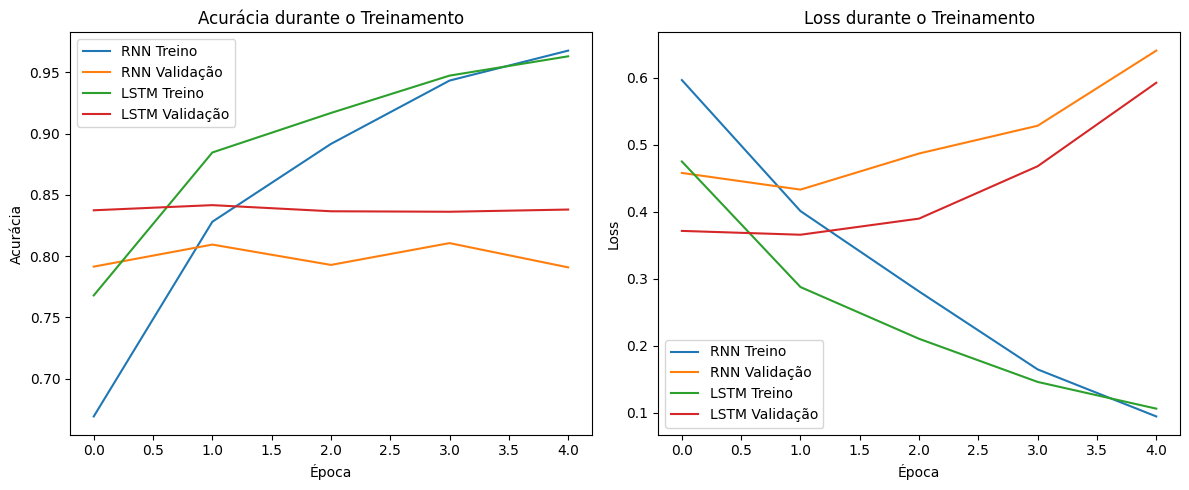

In [6]:
print("Resultados:")
print(f"RNN - Acurácia no teste: {rnn_test_acc:.4f}, Tempo de treinamento: {rnn_training_time:.2f} segundos")
print(f"LSTM - Acurácia no teste: {lstm_test_acc:.4f}, Tempo de treinamento: {lstm_training_time:.2f} segundos")

# Plotar curvas de aprendizado
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='RNN Treino')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validação')
plt.plot(lstm_history.history['accuracy'], label='LSTM Treino')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='RNN Treino')
plt.plot(rnn_history.history['val_loss'], label='RNN Validação')
plt.plot(lstm_history.history['loss'], label='LSTM Treino')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validação')
plt.title('Loss durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Prever probabilidades para todos os exemplos de teste
rnn_preds = rnn_model.predict(X_test).flatten()
lstm_preds = lstm_model.predict(X_test).flatten()

# Encontrar índices onde as previsões discordam (considerando threshold 0.5)
disagreements = np.where((rnn_preds > 0.5) != (lstm_preds > 0.5))[0]

# Selecionar 3 reviews para análise
sample_indices = disagreements[:3]

# Dicionário para mapear números de palavras de volta para texto
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Analisar os reviews selecionados
for idx in sample_indices:
    print(f"\nReview {idx}:")
    print(decode_review(X_test[idx]))
    print(f"Label real: {y_test[idx]}")
    print(f"RNN prediction: {rnn_preds[idx]:.4f} ({'Positivo' if rnn_preds[idx] > 0.5 else 'Negativo'})")
    print(f"LSTM prediction: {lstm_preds[idx]:.4f} ({'Positivo' if lstm_preds[idx] > 0.5 else 'Negativo'})")
    print("="*80)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Review 3:
of killer this as on it deborah film about history in of come br tested was saying was three her length has about to about unusual most was story one let's town of genre when is seriously would with long only king's to future deep i'm dvd have can about people friends of here other it especially fan often somewhere br doesn't characters for he means her seemed states by well potential can when it never means movie so night bad he and daughter film of unusual are of goes her them such of number big bad one left bloody
Label real: 0
RNN prediction: 0.0107 (Negativo)
LSTM prediction: 0.9969 (Positivo)

Review 5:
taxi but shock was does dvd to shock this as on off is very together to was fantastic scares some such badly victims maybe as on are year it's are unknown this factor assured they there's was fantastic life think taxi as it is alexander ve

In [ ]:
# Testar diferentes números de unidades LSTM
unit_values = [64, 128, 256]
unit_results = []

for units in unit_values:
    print(f"\nTreinando LSTM com {units} unidades...")
    model = Sequential()
    model.add(Embedding(max_features, units, input_length=maxlen))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       epochs=5,
                       batch_size=batch_size,
                       validation_split=0.2,
                       verbose=0)

    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    unit_results.append(test_acc)
    print(f"Acurácia no teste: {test_acc:.4f}")

# Testar diferentes comprimentos máximos de sequência
maxlen_values = [50, 100, 200]
maxlen_results = []

for ml in maxlen_values:
    print(f"\nTreinando com maxlen={ml}...")
    # Recarregar e reprocessar dados com novo maxlen
    (X_train_ml, y_train), (X_test_ml, y_test) = imdb.load_data(num_words=max_features)
    X_train_ml = pad_sequences(X_train_ml, maxlen=ml)
    X_test_ml = pad_sequences(X_test_ml, maxlen=ml)

    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=ml))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_ml, y_train,
                       epochs=5,
                       batch_size=batch_size,
                       validation_split=0.2,
                       verbose=0)

    _, test_acc = model.evaluate(X_test_ml, y_test, verbose=0)
    maxlen_results.append(test_acc)
    print(f"Acurácia no teste: {test_acc:.4f}")

# Plotar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar([str(u) for u in unit_values], unit_results)
plt.title('Acurácia por Número de Unidades LSTM')
plt.xlabel('Número de Unidades')
plt.ylabel('Acurácia no Teste')

plt.subplot(1, 2, 2)
plt.bar([str(ml) for ml in maxlen_values], maxlen_results)
plt.title('Acurácia por Comprimento Máximo da Sequência')
plt.xlabel('maxlen')
plt.ylabel('Acurácia no Teste')

plt.tight_layout()
plt.show()


Treinando LSTM com 64 unidades...


In [ ]:
print("\nConclusões:")
print("1. Comparação entre RNN e LSTM:")
print(f"- Acurácia: LSTM ({lstm_test_acc:.4f}) teve desempenho melhor que RNN ({rnn_test_acc:.4f})")
print(f"- Tempo de treinamento: RNN ({rnn_training_time:.2f}s) foi mais rápido que LSTM ({lstm_training_time:.2f}s)")